In [1]:
import pandas as pd
import numpy as np
from io import StringIO
import numpy.linalg as la
import matplotlib.pyplot as plt
from matplotlib import cm as cm
import seaborn as sns
sns.set(font_scale=2)
plt.style.use('seaborn-whitegrid')
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Machine Learning

For this activity, you will explore the basics of machine learning. Machine learning describes a class of methods for automatically building mathematical models based on training data. The dataset that we will work with will be a dataset of Pokemon.

In this activity, you will:
* explore the data using visualization tools   
* split your data into training and test sets  
* create a model to predict whether a Pokemon is legendary or not based on the Pokemon properties.

Load the dataset

In [2]:
# data source: https://www.kaggle.com/abcsds/pokemon/downloads/pokemon.zip/2
df = pd.read_csv("Pokemon.csv")

In the dataset, each row represents a Pokemon. How many Pokemon are in our dataset? How many features are in this dataset?

In [3]:
df.shape

(800, 13)

You can inspect the first few lines of your data using <mark>df.head( )</mark>   

In [4]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Define an array y, such that it contains whether a given Pokemon is legendary or not. The $i$th entry of y denotes whether the $i$th Pokemon is legendary (`True`) or not (`False`). We will later use a classification algorithm to help predict if a Pokemon is legendary.

In [71]:
labels = [ 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
X = df[labels].copy()

In [72]:
X.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,318,45,49,49,65,65,45
1,405,60,62,63,80,80,60
2,525,80,82,83,100,100,80
3,625,80,100,123,122,120,80
4,309,39,52,43,60,50,65


In [73]:
X.std()

Total      119.963040
HP          25.534669
Attack      32.457366
Defense     31.183501
Sp. Atk     32.722294
Sp. Def     27.828916
Speed       29.060474
dtype: float64

In [75]:
B = X - X.mean()

In [76]:
B.mean()

Total      3.105072e-14
HP         1.406875e-14
Attack    -2.209788e-14
Defense    2.390976e-14
Sp. Atk    4.078515e-14
Sp. Def   -1.527667e-14
Speed     -1.477929e-14
dtype: float64

In [77]:
A = B/B.std()

In [79]:
A.std()

Total      1.0
HP         1.0
Attack     1.0
Defense    1.0
Sp. Atk    1.0
Sp. Def    1.0
Speed      1.0
dtype: float64

In [80]:
import numpy.linalg as la

In [81]:
u,s,vt = la.svd(A, full_matrices=False)
V = vt.T

In [82]:
var = s**2
var

array([2.96386828e+03, 8.73795026e+02, 6.22256134e+02, 5.76960882e+02,
       3.42419545e+02, 2.13700139e+02, 1.57816434e-29])

In [83]:
total_var = var.sum()
total_var

5593.000000000003

In [84]:
exp_var = []
for i in var:
    exp_var.append( 100* i/total_var )
exp_var

[52.99245977182794,
 15.623011367406148,
 11.125623701640036,
 10.315767604757001,
 6.122287586158069,
 3.8208499682108106,
 2.8216777029112026e-31]

In [85]:
Xstar = X@V[:,:2]

In [86]:
df['pc1'] = Xstar.iloc[:,0]
df['pc2'] = Xstar.iloc[:,1]

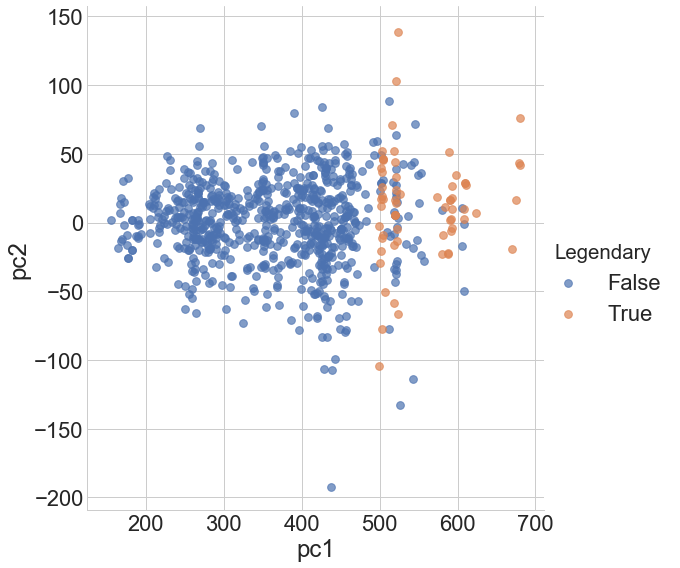

In [87]:

g1 = sns.lmplot('pc1', 'pc2', df, hue='Legendary', fit_reg=False, height=8, scatter_kws={'alpha':0.7,'s':60})

# ax = g1.axes[0,0]
# ax.axhline(y=0, color='k')
# ax.axvline(x=0, color='k')

# headers = iris.columns.values.tolist()

# plot_arrow(V[0,:],2,headers[0],1.8,1)
# plot_arrow(V[1,:],2,headers[1],2,1.2)
# plot_arrow(V[2,:],2,headers[2],1.5,-2.5)
# plot_arrow(V[3,:],2,headers[3],1.6,2)

In [88]:
y = df['Legendary'].astype('int64').values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Not every classifier can work with string or boolean types. Instead of having the array `y` as booleans, we can replace `True` with 1 and `False` with 0.

What are the features in our data that can be used to determine the legendary status of a Pokemon?

Save these features in the variable `labels`. Hint: there are 7 features.

Create another dataframe (name it `X`) with the relevant features.

Then get the numpy array `x` with the values of the DataFrame `X`

# Splitting the dataset

To assess the model’s performance later, we divide the dataset into two parts: a training set and a test set. The first is used to train the system, while the second is used to evaluate the learned or trained model.  
    
We are going to use <mark>sklearn.model_selection.train_test_split</mark> to split the dataset

In [8]:
from sklearn.model_selection import train_test_split

A common splitting choice is to take 2/3 of your original data set as the training set, while the 1/3 that remains will compose the test set. You should select this proportion by assigning the variable <mark>s</mark> and setting the argument <mark>test_sizes = s</mark> in <mark>sklearn.model_selection.train_test_split</mark>.

In [9]:
s = 0.33

We will fix the seed for the random number generator, in order to get reproducible results

In [10]:
seed = 41

Split the arrays `x` and `y` into training data (X_train,Y_train) and test data (X_test,Y_test)

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=s, random_state=seed)

### Logistic regression

Now that we have a dataset to train our model and a dataset to validate our model, we need to construct a model.

To introduce this, we will begin by using a logistic regression model. This is used for classification tasks where data points can only be a member of one class. The model can be solved either using a modified version of least squares or newton's method.

In [12]:
from sklearn.linear_model import LogisticRegression

Using the `LogisticRegression` function, make an instance of the model. Use all the default parameters for now.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [13]:
model = GradientBoostingClassifier()

Using this instance of the model, let's use the training data to train the model.
Use `model.fit(X_train, Y_train)` to train the model.

In [14]:
model.fit(X_train,Y_train)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

## Model Prediction

We now have a trained model and we can begin using it to make predictions. Recall that we want to use our model to predict whether a Pokemon is legendary or not.

Use the model to predict whether the Pokemon in the test dataset `X_test` are legendary.
You can use the model to make predictions using the predict function
```
model.predict(X_test)
```


In [15]:

Ypredict = model.predict(X_test)


In [16]:
Ypredict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [17]:
Y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
(Y_test == Ypredict).sum()/len(Y_test)

0.9356060606060606

In [20]:
len(Y_test)

264

#### But, do we know how good our prediction is? How can we measure how good our model is?

One way of determining the performance of our model is using a confusion matrix. A confusion matrix describes the performance of the classification model on a set of test data for which the true values are known. A confusion matrix stores the true positives, false positives, false negatives, and true negatives for our test data.

In [21]:
from sklearn.metrics import confusion_matrix

Let's use the `confusion_matrix` function in sklearn to construct a confusion matrix for our dataset.

In [22]:

cmat = confusion_matrix(Y_test, Ypredict)
TN,FP,FN,TP = cmat.ravel()
print(TN,FP,FN,TP)

237 8 9 10


 $$  \text{Confusion matrix} = \left[ \begin{array} {cccc} TN & FP\\ FN&TP \end{array} \right] $$
 
TN: Predicted no (not engendary), and the pokemon is not legendary. (How many non-legendary pokemons are correctly identified?)

FP: Predicted yes (legendary), but the pokemon is not legendary. (How many non-legendary pokemon are identified as legendary? )


FN: Predicted no (not lengendary), but the pokemon is actually legendary. (How many legendary pokemon are missed?)

TP: Predicted yes (legendary), and the pokemon is legendary. (How many legendary pokemons are correctly identified? )  




#### There are different "scores" to quantify how good the model is. Here are some of them:

1) Accuracy: fraction of correct classification https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [23]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, Ypredict)

0.9356060606060606

In [24]:
(Y_test == Ypredict).sum()/len(Y_test)


0.9356060606060606

2) Precision: when it predicts yes (legendary), how often is the prediction correct?
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html

In [25]:
from sklearn.metrics import precision_score

precision_score(Y_test, Ypredict)

0.5555555555555556

In [26]:
TP/(FP+TP)


0.5555555555555556

3) Recall: when actually yes (legendary), how often is the prediction correct? https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html

In [27]:
from sklearn.metrics import recall_score

recall_score(Y_test, Ypredict)

0.5263157894736842

In [ ]:
TP/(FN+TP)



## Different Models:

Starting with an initial dataset, we learned how to prepare the data, split the data, construct a model, and then use the model using sklearn.

Let's try and repeat this experiment now but with a different model. Below are 5 different classifiers (models) found in sklearn. Compare your results for each of the classifiers. Which works best for the task of determining legendary status of a Pokemon?

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC